In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from statsmodels.api import Logit
from sklearn.preprocessing import LabelEncoder

### Configuration
Configure the notebooks to make a better look and feel which assists to do the analysis in easy ways.

In [82]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [83]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df = df.loc[:, df.columns != 'Q_1']
df = df.drop(columns=['Q_14', 'Q_15'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,Female,26,10,115000,Dead,Dead,Yes,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree
3,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very_much,Good,Urban,No,Average,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Neutral


In [84]:
categorical_d = ['Q_2', 'Q_7', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_20', 'Q_21', 'Q_22', 'Q_23', 'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28', 'Q_29', 'Q_30', 'Q_31', 'Q_32', 'Q_33', 'Q_34', 'Q_35_i', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_v', 'Q_35_vi', 'Q_36', 'Q_37_i', 'Q_37_ii', 'Q_37_iii', 'Q_37_iv', 'Q_37_v', 'Q_37_vi', 'Q_37_vii', 'Q_37_viii', 'Q_37_ix', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']

numerical_d = ['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']

df[categorical_d].head(2)

,Q_2,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,Dead,Primary,Less,Bad,Rural,No,Average,No,Neutral,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,Female,Dead,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree


In [85]:
for i in categorical_d:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out  No  Yes
Q_2              
Female    29   46
Male      37   98
------------------
Drop_out  No  Yes
Q_7              
Adults    66  141
Dead       0    3
------------------
Drop_out          No  Yes
Q_8                      
Higher_Education  25    7
Primary           24   93
Secondary         17   44
------------------
Drop_out   No  Yes
Q_9               
Less        5   41
Neutral     9   18
Very_much  52   85
------------------
Drop_out  No  Yes
Q_10             
Average   11   73
Bad        2   16
Good      53   55
------------------
Drop_out  No  Yes
Q_11             
Rural     36  117
Urban     30   27
------------------
Drop_out        No  Yes
Q_12                   
No               0   91
Not_Applicable  66    0
Yes              0   53
------------------
Drop_out  No  Yes
Q_13             
Average   32   79
Bad        4   37
Good      30   28
------------------
Drop_out  No  Yes
Q_16             
22         0    2
No        27  113
Yes       39   29
-----------------

In [86]:
# fig = plt.figure(figsize=(32, 90))
# k = 1
# for i in categorical_d:
#     plt.subplot(13, 4, k)
#     crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
#     # sns.barplot(crs)
#     sns.heatmap(crs)
#     k += 1

# plt.show()

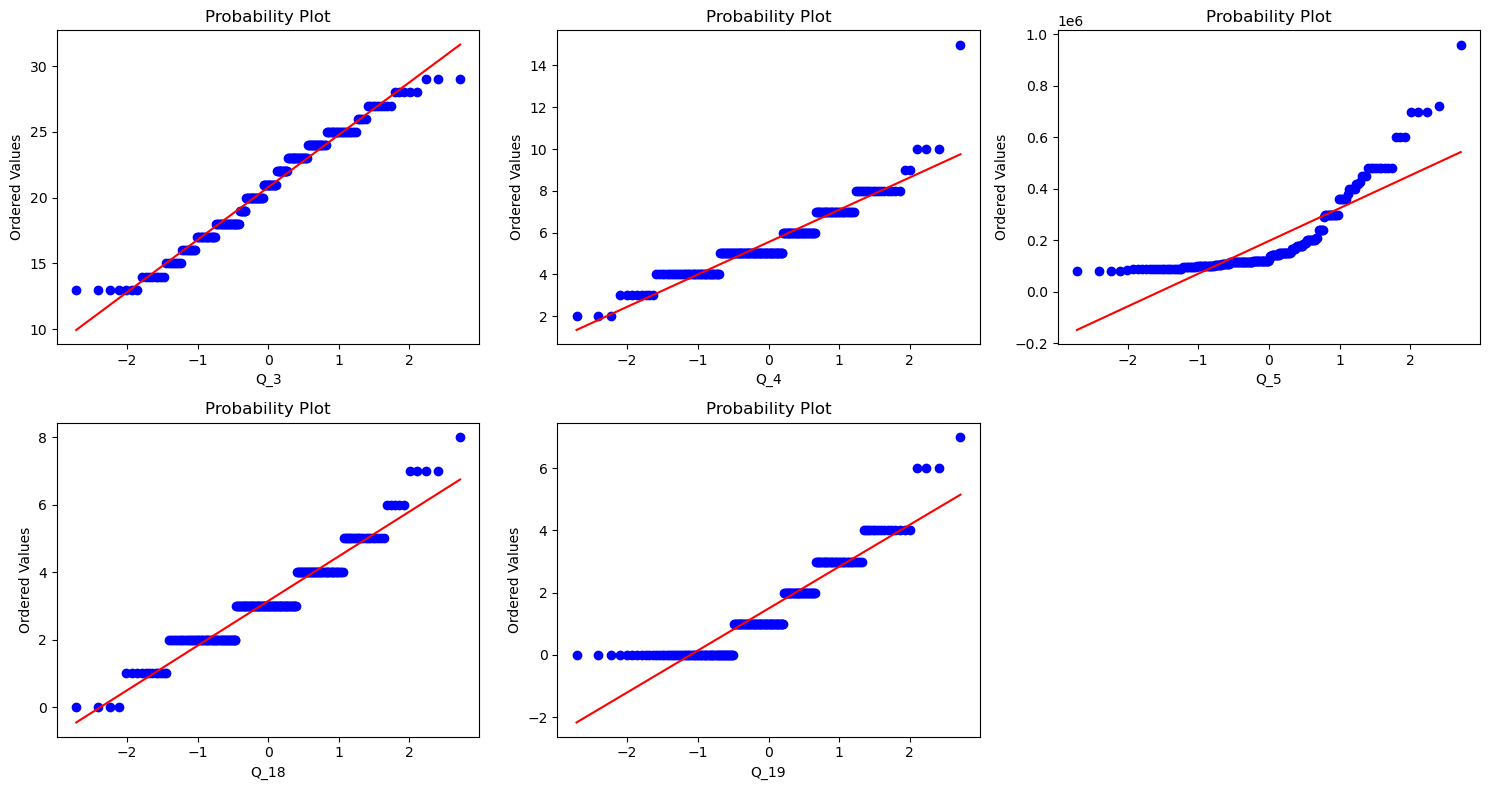

In [87]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    # sns.distplot(df[i], hist=False, kde=True)
    pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

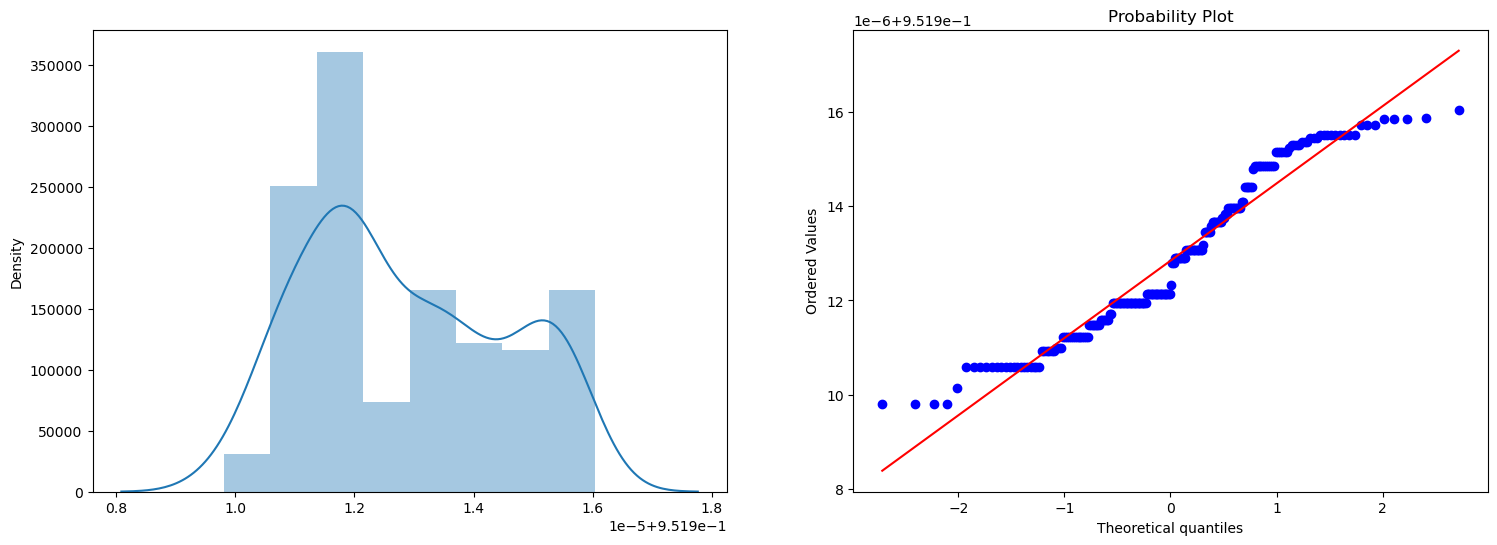

In [88]:
FQ_5, lam = stats.boxcox(df['Q_5'])
fig , g = plt.subplots(1,2, figsize=(18,6))
# Histogram
g1 = sns.distplot(FQ_5, ax=g[0]);
# QQPlot
g2 = stats.probplot(FQ_5, dist='norm', plot=plt);

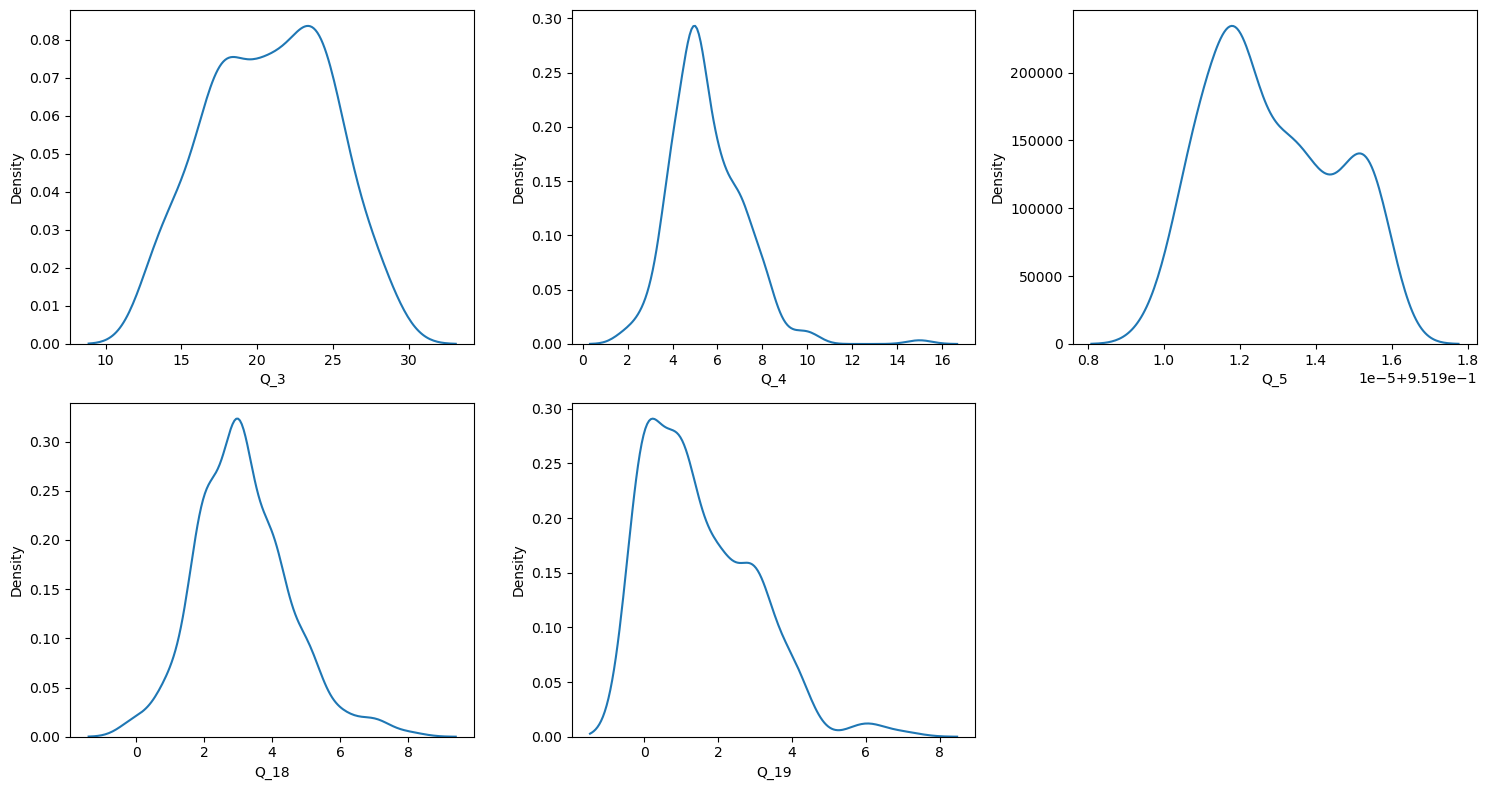

In [89]:
df['Q_5'] = FQ_5

fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    sns.distplot(df[i], hist=False, kde=True)
    # pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

In [90]:
df = pd.get_dummies(df, columns=['Drop_out'], drop_first=True)
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv,Drop_out_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,0.951913,Seniors,Dead,Primary,Less,Bad,Rural,No,Average,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,1
2,Female,26,10,0.951912,Dead,Dead,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree,1
3,Female,26,6,0.951912,Seniors,Adults,Primary,Very_much,Good,Urban,No,Average,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Neutral,1


In [105]:
df['Drop_out_Yes'].dtype

dtype('uint8')

In [106]:
lgr = Logit(endog=df['Drop_out_Yes'], exog=df[numerical_d]).fit()
lgr.summary()

Optimization terminated successfully.
         Current function value: 39.101211
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Drop_out_Yes   No. Observations:                  210
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                     inf
Time:                        01:28:26   Log-Likelihood:                -8211.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Q_3            0.2541      0.054      4.710      0.000       0.148       0.360
Q_4            0.0767      0.188      0.408      0.683      -0.292       0.445
Q_5           -5.4606      1.245     -4.387      0.000      -7.900      -3.021
Q_18          -0.1568      0.215     -0.730      0.465      -0.578       0.264
Q_19           0.8119      0.177      4.588      0.000       0.465       1.159
==============================================================================
"""

In [92]:
import plotly.graph_objects as go
import numpy as np

nc = df[numerical_d].corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = nc.columns,
        y = nc.index,
        z = np.array(nc),
        text=nc.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

In [93]:
sig_factors = []

for i in numerical_d:
    p_val = stats.kstest(df[i], 'norm').pvalue
    if p_val<0.05:
        sig_factors.append(i)

for i in categorical_d:
    crs = pd.crosstab(index=df['Drop_out_Yes'], columns=df[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

In [94]:
display(df[sig_factors].dtypes)

Q_3            int64
Q_4            int64
Q_5          float64
Q_18           int64
Q_19           int64
Q_8           object
Q_9           object
Q_10          object
Q_11          object
Q_12          object
Q_13          object
Q_16          object
Q_17          object
Q_21          object
Q_23          object
Q_24          object
Q_27          object
Q_29          object
Q_31          object
Q_34          object
Q_35_ii       object
Q_35_iii      object
Q_35_iv       object
Q_35_vi       object
Q_36          object
Q_37_iii      object
Q_37_iv       object
Q_37_vi       object
Q_37_vii      object
Q_37_xiii     object
Q_37_xiv      object
Q_37_xv       object
dtype: object

In [95]:
X = df[sig_factors]
y = df['Drop_out_Yes']
X.head(3)

,Q_3,Q_4,Q_5,Q_18,Q_19,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_vi,Q_36,Q_37_iii,Q_37_iv,Q_37_vi,Q_37_vii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,0.951913,7,6,Primary,Less,Bad,Rural,No,Average,No,Neutral,Yes,No,No,Rural,Good,Public,Neutral,No,No,No,No,Yes,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,26,10,0.951912,8,7,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,No,No,Yes,Rural,Good,Public,Yes,No,No,No,Yes,Yes,Strongly_disagree,Neutral,Disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Agree
3,26,6,0.951912,4,4,Primary,Very_much,Good,Urban,No,Average,No,Neutral,Yes,No,Yes,Urban,Good,Private,Yes,No,No,No,Yes,Yes,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_agree,Strongly_agree,Neutral


In [96]:
X = pd.get_dummies(X, columns=sig_factors[5:], drop_first=True)
X.head(3)

,Q_3,Q_4,Q_5,Q_18,Q_19,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very_much,Q_10_Bad,Q_10_Good,Q_11_Urban,Q_12_Not_Applicable,Q_12_Yes,Q_13_Bad,Q_13_Good,Q_16_No,Q_16_Yes,Q_17_No_Support,Q_17_Supportive,Q_21_Yes,Q_23_Yes,Q_24_Yes,Q_27_Urban,Q_29_Good,Q_29_Neutral,Q_31_Public,Q_34_No,Q_34_Yes,Q_35_ii_Yes,Q_35_iii_Yes,Q_35_iv_Yes,Q_35_vi_Yes,Q_36_Yes,Q_37_iii_Disagree,Q_37_iii_Neutral,Q_37_iii_Strongly_agree,Q_37_iii_Strongly_disagree,Q_37_iv_Disagree,Q_37_iv_Neutral,Q_37_iv_Strongly_agree,Q_37_iv_Strongly_disagree,Q_37_vi_Disagree,Q_37_vi_Neutral,Q_37_vi_Strongly_agree,Q_37_vi_Strongly_disagree,Q_37_vii_Disagree,Q_37_vii_Neutral,Q_37_vii_Strongly_agree,Q_37_vii_Strongly_disagree,Q_37_xiii_Disagree,Q_37_xiii_Neutral,Q_37_xiii_Strongly_agree,Q_37_xiii_Strongly_disagree,Q_37_xiv_Disagree,Q_37_xiv_Neutral,Q_37_xiv_Strongly_agree,Q_37_xiv_Strongly_disagree,Q_37_xv_Disagree,Q_37_xv_Neutral,Q_37_xv_Strongly_agree,Q_37_xv_Strongly_disagree
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,0.951913,7,6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,26,10,0.951912,8,7,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,26,6,0.951912,4,4,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [103]:
X[X.columns[5:]] = X[X.columns[5:]].astype(object)
X.dtypes.value_counts()

object     57
int64       4
float64     1
dtype: int64

In [104]:
mlog = Logit(endog=y, exog=X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# X = df.drop('Drop_out', axis=1)
# y = df['Drop_out']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)